# Desafio Neoway - Conclusão

<p><b>Cientista de Dados:</b> Cassiano J. Pereira</p>
<p><b>Data:</b> 22/11/2021</p>

## Bibliotecas Utilizadas

In [5]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Carregando as Tabela Conexões Indivíduos com as Predições

In [6]:
file = 'individuos_conexoes_previstos.csv'

In [8]:
df_individuos_conexoes_previstos = pd.read_csv(file, sep=';')
df_individuos_conexoes_previstos

,idade1,estuda1,trabalha1,pratica_esportes1,idade2,estuda2,trabalha2,pratica_esportes2,prob_V1_V2,qt_filhos1_0.0,...,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara,IMC1_cut,IMC2_cut,hex_cat_todos,cluster
0,44.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0.589462,0,...,0,1,0,0,1,0,5,7,240421249.0,0
1,44.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.708465,0,...,0,1,0,0,0,1,5,4,240181537.0,0
2,24.0,0.0,0.0,1.0,30.0,1.0,0.0,1.0,0.638842,1,...,0,1,0,0,0,1,7,1,247515432.0,0
3,35.0,0.0,0.0,1.0,55.0,1.0,1.0,1.0,0.709608,0,...,1,0,0,1,0,0,4,8,264397858.0,4
4,50.0,1.0,1.0,0.0,42.0,0.0,1.0,0.0,0.465209,0,...,0,0,0,1,0,0,7,9,20121880.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,30.0,1.0,0.0,1.0,32.0,0.0,1.0,0.0,0.748095,0,...,0,1,0,0,1,0,9,7,89433224.0,3
999995,30.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,0.744036,0,...,1,0,0,1,0,0,9,2,72508552.0,3
999996,23.0,1.0,1.0,0.0,34.0,0.0,1.0,1.0,0.359774,1,...,0,1,0,0,0,1,5,2,187746696.0,2
999997,23.0,1.0,1.0,0.0,40.0,0.0,1.0,1.0,0.470589,1,...,0,1,0,0,0,1,5,6,187752840.0,2


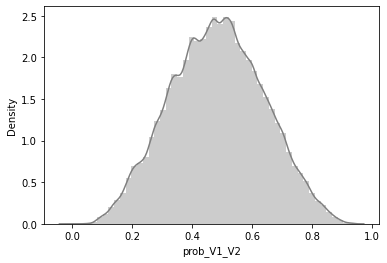

In [9]:
sbn.distplot(df_individuos_conexoes_previstos['prob_V1_V2'], color='gray');

## Criando classes para os  níveis da taxa de contágio

In [17]:
labels = ['Baixo', 'Médio', 'Alto']
df_individuos_conexoes_previstos['nivel'] = pd.qcut(df_individuos_conexoes_previstos['prob_V1_V2'], 3, labels=labels)

## Verificando informações para tomada de decisão

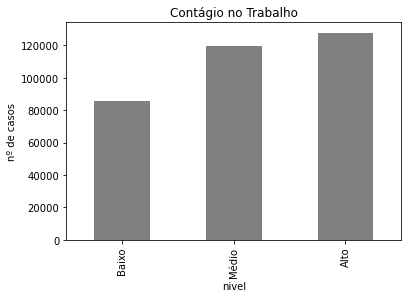

In [28]:
nivel_trabalho = df_individuos_conexoes_previstos.groupby('nivel').grau_trabalho.sum();
nivel_trabalho.plot.bar(ylabel='nº de casos', color='gray');
plt.title('Contágio no Trabalho');

In [ ]:
nivel_trabalho = df_individuos_conexoes_previstos.groupby('nivel').grau_trabalho.sum();
nivel_trabalho.plot.bar(ylabel='nº de casos', color='gray');
plt.title('Contágio no Trabalho');

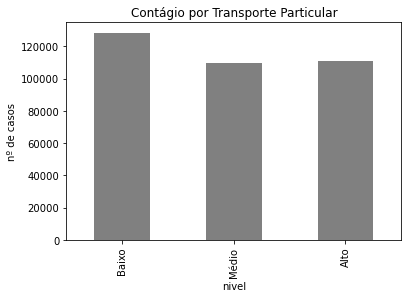

In [47]:
nivel_transporte_particular = df_individuos_conexoes_previstos.groupby('nivel').transporte_mais_utilizado1_particular.sum();
nivel_transporte_particular.plot.bar(ylabel='nº de casos', color='gray');
plt.title('Contágio por Transporte Particular');

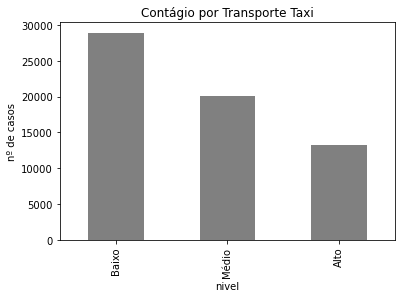

In [49]:
nivel_transporte_taxi = df_individuos_conexoes_previstos.groupby('nivel').transporte_mais_utilizado1_taxi.sum();
nivel_transporte_taxi.plot.bar(ylabel='nº de casos', color='gray');
plt.title('Contágio por Transporte Taxi');

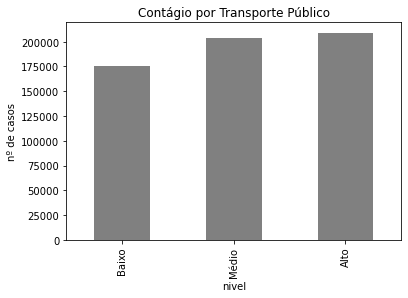

In [50]:
nivel_transporte_publico = df_individuos_conexoes_previstos.groupby('nivel').transporte_mais_utilizado1_publico.sum();
nivel_transporte_publico.plot.bar(ylabel='nº de casos', color='gray');
plt.title('Contágio por Transporte Público');

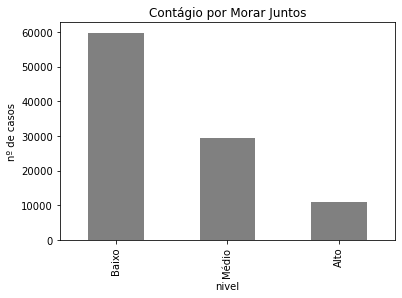

In [59]:
nivel_mora_junto = df_individuos_conexoes_previstos.groupby('nivel').proximidade_mora_junto.sum();
nivel_mora_junto.plot.bar(ylabel='nº de casos', color='gray');
plt.title('Contágio por Morar Juntos');

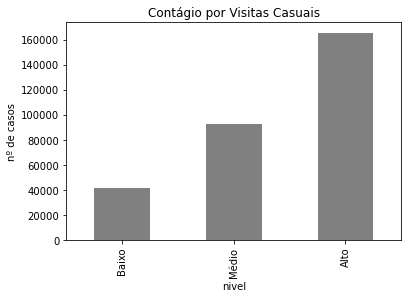

In [60]:
nivel_visita_casual = df_individuos_conexoes_previstos.groupby('nivel').proximidade_visita_casual.sum();
nivel_visita_casual.plot.bar(ylabel='nº de casos', color='gray');
plt.title('Contágio por Visitas Casuais');

# Políticas de Saúde

Baseado nos dados previstos e análisados acima, tomando como foco atititudes que restrinjam ou reduzam o contágio, uma das possibilidade seria incentivar ainda mais o trabalho remoto. Outra atitude seria identificar os modos de transmissão deste vírus e conforme, distribuir utensílios de proteção para a população de modo a diminuir a trasmissão em ambientes como, por exemplo, transporte público.